<div class="alert alert-block alert-info">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Unidad 2: Conceptos Generales</center></font>
<font face = "Times New Roman" size = "4"><center>Tema 2.6: Conceptos del Procesamiento de Imágenes</center></font>
<font face = "Times New Roman" size = "4"><center>Subtema c: Imágenes Multiespectrales</center></font></b>
</div>

## IMÁGENES MULTIESPECTRALES

Las **Imágenes Multiespectrales** aportan información de los colores presentes en una escena dentro del *Espectro Visible (EV)*, y adicionalmente otras bandas cuyo número no pasa de 9, mayormente del infrarrojo. Algunos autores indican que una imagen debe considerarse como **Hiperespectral** cuando contiene más de 10 bandas de información, aunque otros aumentan dicho número a 20. 

Como ejemplo de aplicación, en la ***Agricultura de Precisión*** se utiliza la banda del infrarrojo cercano que abarca las longitudes de onda desde *0.79* a *0.89 $\mu$m*, aprovechando que la vegetación presenta altos niveles de absorción de las luz visible y refleja la luz infrarroja en función del estado de salud y de vigorosidad de las plantas. Para el uso de **Imágenes Multiespectrales** en Agricultura, se requiere:

1. Adquirir las *Firmas Espectrales (FE)* de los cultivos sanos de interés en condiciones controladas y crear una base de datos referencia, que servirá para comparar en el futuro. 
2. Agregar las *FE* de cultivos enfermos a la base de datos de referencia. 
3. Al tomar imágenes aéreas, se compara el análisis espectral con la base de datos de referencia por medio de computadoras que analizan y obtienen la *FE* de cada sección del terreno y proporciona un mapa con la distribución espacial de los cultivos en que se encuentran en las distintas secciones y del estado en que éste se encuentra.

Para ejemplificar el manejo de **Imágenes Multiespectrales** empleando **OpenCV**, se empleará una imagen de ejemplo que fue obtenida por el Satélite ***SPOT-5*** que pertenece a la *Agencia Espacial Francesa (CNES)*.
<br>
<img src="./Imagenes/Spot_logo.png" style="width:199px;height:150px;" class="center">
<br>
El Satélite ***SPOT-5*** fue puesto en órbita en mayo de 2002 cerrando su ciclo de vida en 2014. Su órbita era:
* Orbita circular sincrónica con la del Sol.
* Altitud: 832 kilómetros.
* Inclinación: 98.7 grados.
* Periodo: 101.4 minutos.
* Cruce en el Ecuador: 10:30am cada 26 días.
* Revoluciones por día: Aproximadamente 14.

Se puede consultar más información sobre la misión del Satélite ***SPOT-5*** [en esta liga](https://earth.esa.int/web/eoportal/satellite-missions/s/spot-5).

La escena a analizar corresponde a una **Imagen Multiespectral** del *Área Metropolitana de Guadalajara*. Sus características son:

* Resolución Espacial: 20 metros (modo espectral Hi).
* Tamaño de la Imagen: (6000 x 6000 x 4) pixeles.
* Resolución Espectral: 4 bandas.

Las 4 bandas espectrales de la imagen son:

1. Banda **XS3**: **Infrarrojo Cercano (Near Infrared)** en modo multiespectral, con longitud de onda de *0.79* a *0.89 $\mu$m*.
2. Banda **XS2**: **Rojo (Red)** en modo multiespectral, con longitud de onda de *0.61* a *0.68 $\mu$m*.
3. Banda **XS1**: **Verde (Green)** en modo multiespectral, con longitud de onda de *0.50* a *0.59 $\mu$m*.
4. Banda **SWIR**: **Infrarrojo de Onda Corta (Short-Wave Infrared)** en modo multiespectral, con longitud de onda de *1.58* a *1.75 $\mu$m*.

La escena es:
<br>
<img src="./Imagenes/Spot5.jpg" style="width:400px;height:400px;" class="center">
<br>
***Nota:*** Esta escena es mostrada en formato `JPG` con solo 3 bandas y para fines ilustrativos.

Para el ejercicio, se extraerá una zona de (2000 x 2000 x 4) pixeles con el objetivo de simplificar el tiempo de procesamiento a ser empleado. La imagen está en formato `TIFF` con el nombre `SPOT5.tif`, la cual contiene datos de 8 bits (en un rango de ***0*** a ***255*** con valores enteros solamente).

El proceso de lectura de la imagen empleando **OpenCV** es similar al que se usa para una imagen en formato `JPG`, sin embargo es necesario modificar los atributos en el método `.imread(a,b)` de la siguiente manera:

* El atributo `a`: Es el nombre del archivo que contiene a la imagen en formato `TIFF`.
* El atributo `b`: Se empleará `cv2.IMREAD_UNCHANGED` para que pueda hacer la lectura de más de 3 bandas.

Esto es:

In [1]:
#Importación de Librerías
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

#Lectura de la Imagen desde un archivo TIFF
SPOT = cv2.imread("./Imagenes/SPOT5.tif", cv2.IMREAD_UNCHANGED)   

#Impresión de valores de la imagen
print("La cantidad de pixeles en la imagen es:", SPOT.size)
print("El tamaño de la imagen es:", SPOT.shape)
print("El tipo de datos contenidos en la imagen es:", SPOT.dtype)

La cantidad de pixeles en la imagen es: 16000000
El tamaño de la imagen es: (2000, 2000, 4)
El tipo de datos contenidos en la imagen es: uint8


A continuación se muestra la imagen haciendo uso del método `.imshow()` de la librería **Matplotlib** como ya se ha realizado en previas ocasiones.

Nuevamente, podrá notarse que la imagen resultante no es similar a la imagen original ya que tiene un cierto matiz azulado. El motivo es el mismo, **OpenCV** lee las imágenes en formato `BGR` para las primeras 3 bandas contenidas en la misma.

En la imagen es posible distinguir la *Laguna de Cajititlán* justo al sur del *Aeropuerto Internacional de Guadalajara* del cual se puede distinguir la pista de aterrizaje. Hacia el oeste se pueden ver el *Cerro de las Mitras* así como el *Cerro de la Cruz* que envuelven el municipio de *Tlajomulco de Zúñiga*.

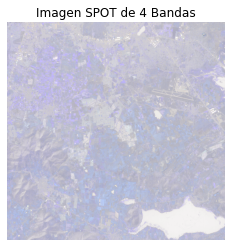

In [2]:
#Impresión de la Imagen SPOT
plt.imshow(SPOT)
plt.axis('off')
plt.title("Imagen SPOT de 4 Bandas")
plt.show()

Para leer los canales (bandas) de manera individual, se emplea el método `.split()` donde el parámetro es simplemente la variable que contiene la matriz con la información de la imagen. Posteriormente se muestran los canales de manera individual.

***Nota:*** El orden de los canales como los lee **OpenCV** es `XS1`, `XS2`, `XS3` y `SWIR`. Sin embargo, el orden con el que **SPOT-5** los captura es  `XS3`, `XS2`, `XS1` y `SWIR`.

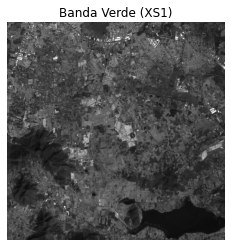

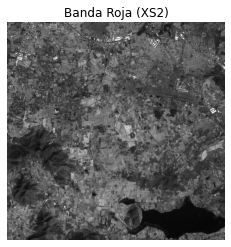

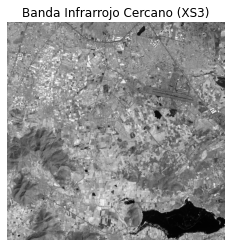

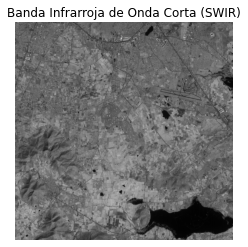

In [3]:
#Valores de los Canales contenidos en la imagen BGR
XS1, XS2, XS3, SWIR = cv2.split(SPOT)

#Impresión de la Banda XS1
plt.imshow(XS1, cmap='gray')        
plt.axis('off')
plt.title("Banda Verde (XS1)")
plt.show()

#Impresión de la Banda XS2
plt.imshow(XS2, cmap='gray')        
plt.axis('off')
plt.title("Banda Roja (XS2)")
plt.show()

#Impresión de la Banda XS3
plt.imshow(XS3, cmap='gray')        
plt.axis('off')
plt.title("Banda Infrarrojo Cercano (XS3)")
plt.show()

#Impresión de la Banda SWIR
plt.imshow(SWIR, cmap='gray')        
plt.axis('off')
plt.title("Banda Infrarroja de Onda Corta (SWIR)")
plt.show()

Es posible realizar un ordenamiento de las bandas para que correspondan con su orden original empleando **OpenCV**. 

Para ello se emplea el método `.merge()` donde se indica en sus atributos el orden adecuado de las bandas:

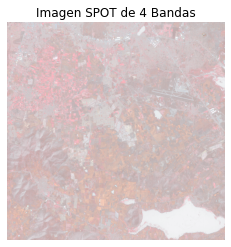

In [4]:
#Modificación del orden de las bandas
SPOT5 = cv2.merge([XS3,XS2,XS1,SWIR])

#Impresión de la Imagen SPOT
plt.imshow(SPOT5)
plt.axis('off')
plt.title("Imagen SPOT de 4 Bandas")
plt.show()

Finalmente, es posible extraer alguna de las bandas para que resten solo 3 de ellas, ello puede generar archivos en fomato `JPG` para fines de visualización de resultados:

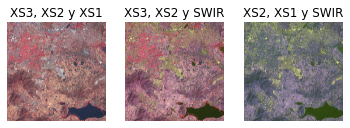

In [5]:
#Modificación del Espacio de Color
Comb1 = cv2.merge([XS3,XS2,XS1])
Comb2 = cv2.merge([XS3,XS2,SWIR])
Comb3 = cv2.merge([XS2,XS1,SWIR])

plt.subplot(1,3,1), plt.imshow(Comb1), plt.axis('off'), plt.title("XS3, XS2 y XS1")
plt.subplot(1,3,2), plt.imshow(Comb2), plt.axis('off'), plt.title("XS3, XS2 y SWIR")
plt.subplot(1,3,3), plt.imshow(Comb3), plt.axis('off'), plt.title("XS2, XS1 y SWIR")
plt.show()

<div class="alert alert-block alert-success">
<b>.: Fin del Subtema :.</b>
</div>

***Liga de aceso al siguiente Subtema:*** 
<br>[d. Procesamiento de Imágenes](d.%20Procesamiento%20de%20Imagenes.ipynb)